In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import math
import sys
%matplotlib inline

sns.set()

# training : 365days, test : 30days

テストデータ期間の日付を結合

In [2]:
for i in range(1,23):
    test_pass2 = '../test/test' + str(i) + '.csv'
    test_date2 = pd.read_csv(test_pass2)
    if i == 1:
        total_test_date2 = test_date2['date']
    else:
        total_test_date2 = pd.concat([total_test_date2, test_date2['date']], axis=0)

In [3]:
len(total_test_date2)

634

結果の結合

In [4]:
def connect(variable):
    for i in range(1,23):
        # result_pass2 = '../result/skti/test' + str(i) + '/result_mean.csv' 
        result_pass2 = '../result/' + variable +'/test' + str(i) + '/result_mean.csv' 

        result2 = pd.read_csv(result_pass2)
        # print(len(result))
        if i == 1:
            total_result2 = result2.iloc[:,1]
        else:
            total_result2 = pd.concat([total_result2, result2.iloc[:,1]], axis=0)
    
    test_index2 = []
    for i in total_test_date2:
        test_index2.append(pd.to_datetime(i)) 
    test_result2 = pd.DataFrame(list(zip(test_index2,total_result2)), columns = ['date','CustNum'])
    # dateをインデックスに割り当て
    test_result2 = test_result2.set_index('date')
    return test_result2

        

In [5]:
ei_result = connect('ei')
ei_trend_result = connect('ei_trend')
trend_result = connect('trend')
none_result = connect('non')

日付と結果の結合

In [6]:
test_index2 = []
for i in total_test_date2:
        test_index2.append(pd.to_datetime(i)) 
test_result2 = pd.DataFrame(list(zip(test_index2,total_result2)), columns = ['date','CustNum'])
# dateをインデックスに割り当て
test_result2 = test_result2.set_index('date')


NameError: name 'total_result2' is not defined

実測値のデータをプロットできるように

In [15]:
all_data = pd.read_csv('../data.csv')

all_data = all_data.loc[:,['date','CustNum']]

In [16]:
# date列をタイムスタンプ型に
def timestamp_data(df):
    index_lst = [] 
    for i in df['date']:
        index_lst.append(pd.to_datetime(i)) 
    split_df = pd.DataFrame(list(zip(index_lst,df.iloc[:,1])), columns = ['date','CustNum'])
    return split_df

all_data = timestamp_data(all_data)
all_data = all_data.set_index('date')


(array([17410., 17532., 17652., 17775., 17897., 18017., 18140., 18262.,
        18383.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

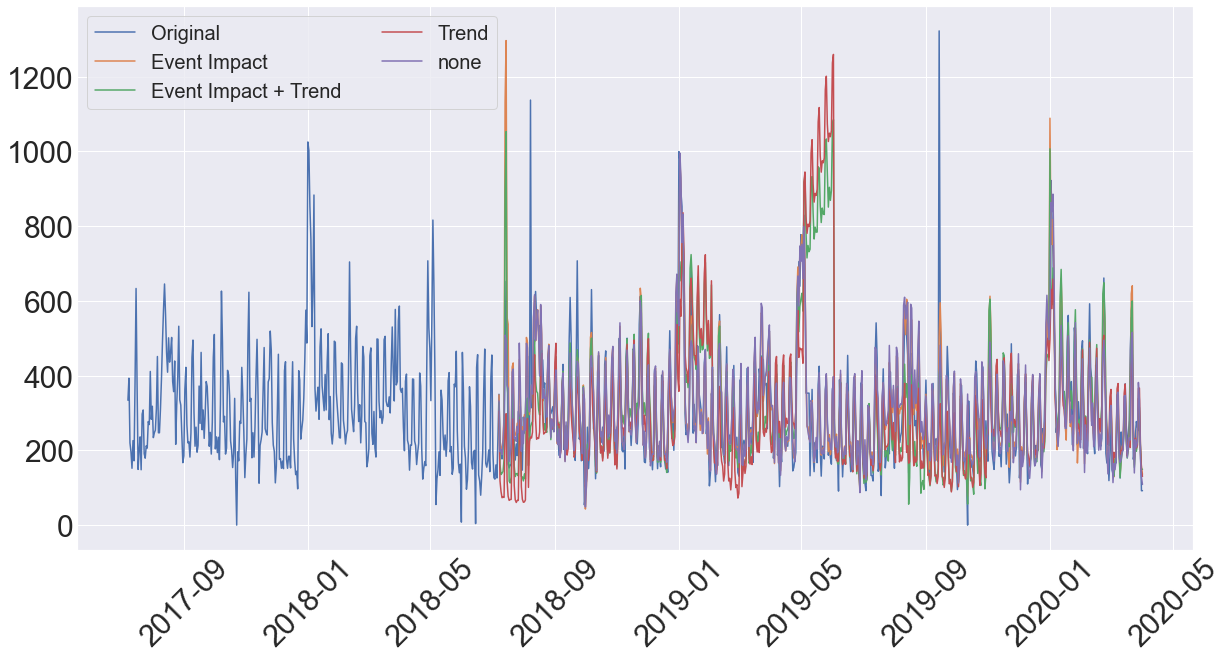

In [71]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_data, label='Original')
plt.plot(ei_result["CustNum"],label='Event Impact')
plt.plot(ei_trend_result["CustNum"],label='Event Impact + Trend')
plt.plot(trend_result["CustNum"],label='Trend')
plt.plot(none_result["CustNum"],label='none')
# sxmin='2018-07-08'
# sxmax='2020-03-12'

# xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

(array([17713., 17720., 17727., 17734., 17744., 17751., 17758., 17765.,
        17775.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

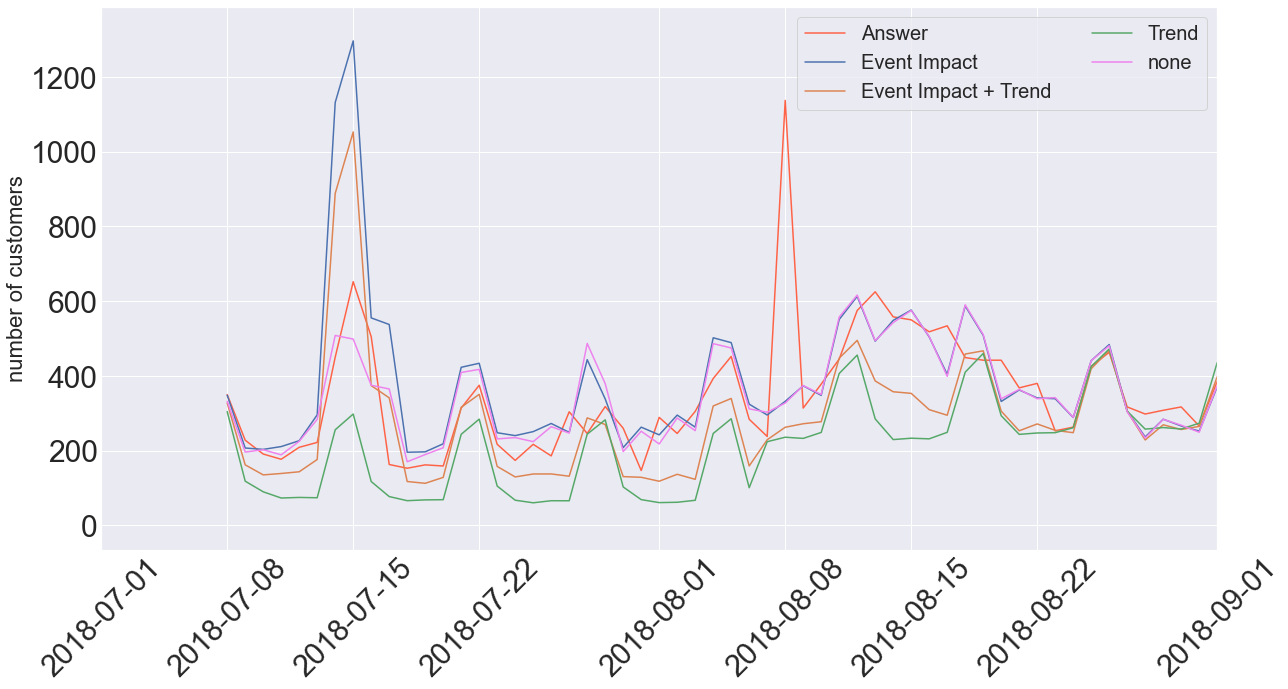

In [81]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_data[-len(total_test_date2):], label='Answer', color = 'tomato')
plt.plot(ei_result["CustNum"],label='Event Impact')
plt.plot(ei_trend_result["CustNum"],label='Event Impact + Trend')
plt.plot(trend_result["CustNum"],label='Trend')
plt.plot(none_result["CustNum"],label='none', color = 'violet')


# sxmin='2019-04-01'
# sxmax='2019-07-01'
# sxmin='2018-12-01'
# sxmax='2019-02-01'
# sxmin='2019-06-01'
# sxmax='2019-10-01'
sxmin='2018-07-01'
sxmax='2018-09-01'

# sxmin='2019-08-01'
# sxmax='2019-12-01'

xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
plt.xlim([xmin,xmax])

ax.set_ylabel("number of customers",fontsize=22)
plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

In [65]:
event_impact = pd.read_csv("../csv/event_impact.csv")
event_impact = timestamp_data(event_impact)

In [66]:
event_impact = event_impact.set_index('date')

(array([17713., 17775., 17836., 17897., 17956., 18017., 18078., 18140.,
        18201., 18262., 18322., 18383.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

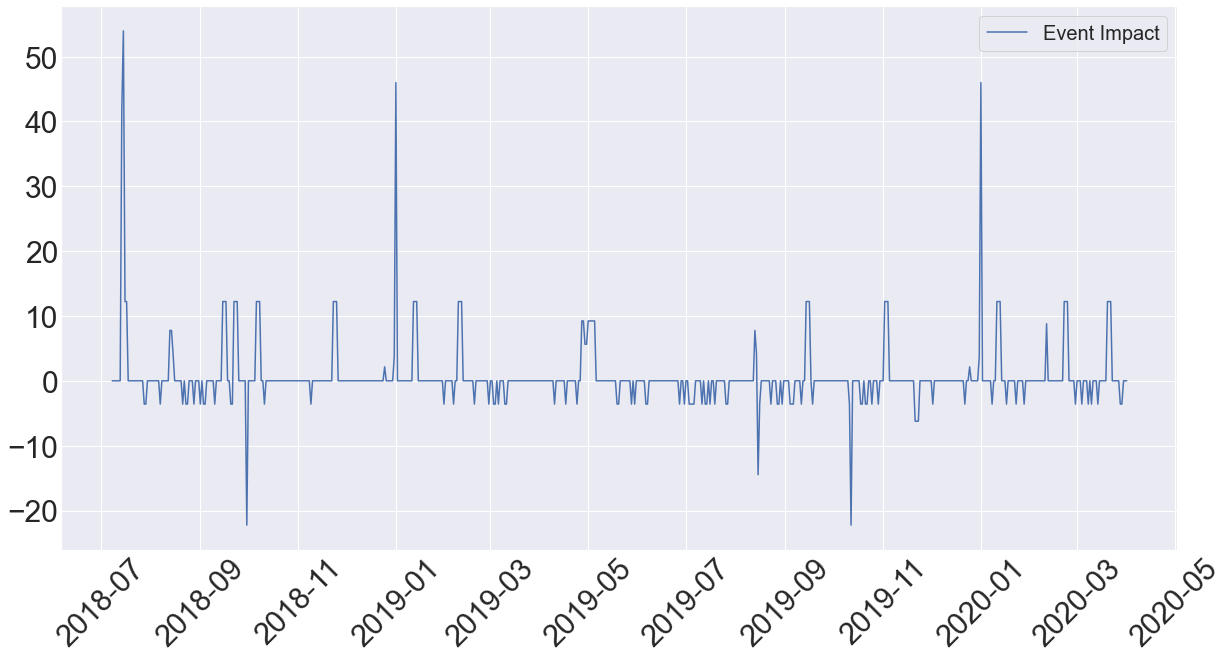

In [69]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(event_impact[-len(total_test_date2):], label='Event Impact')
# plt.bar(event_impact['date'][-len(total_test_date2):], event_impact['CustNum'][-len(total_test_date2):], label='Event Impact')

# sxmin='2018-07-08'
# # sxmax='2020-03-12'
# sxmax = '2018-08-10'

# xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)

誤差

In [ ]:
test_result2["error"] = test_result2["CustNum"] - all_data["CustNum"][-len(test_result2):]

(array([17987., 18001., 18017., 18031., 18048., 18062., 18078.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

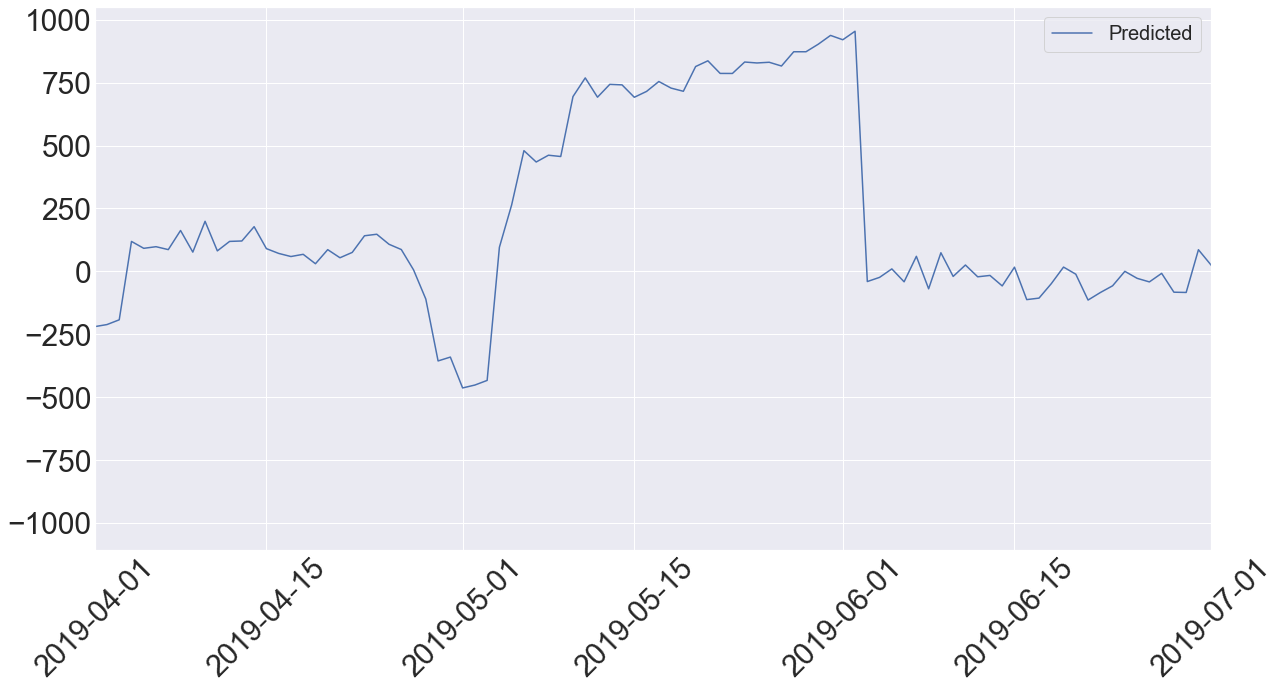

In [ ]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
#plt.plot(all_data, label='Original')
plt.plot(test_result2["error"],label='Predicted')

sxmin='2019-04-01'
sxmax='2019-07-01'

xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")